In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Data/filtered_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24307 entries, 0 to 24306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24307 non-null  float64
 1   bathrooms      24307 non-null  float64
 2   toilets        24307 non-null  float64
 3   parking_space  24307 non-null  float64
 4   title          24307 non-null  object 
 5   town           24307 non-null  object 
 6   state          24307 non-null  object 
 7   price          24307 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
# Define features and target
X = df[['bedrooms', 'bathrooms', 'toilets', 'parking_space']]
y = df['price']

# Convert categorical 'state' column into numerical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'toilets', 'parking_space']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['state'])
    ])
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
models= {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    results.append({'Model': name, 'MSE': mse, 'R2 Score': r2})
df_results = pd.DataFrame(results)

Linear Regression: 
  Mean Squared Error: 65770509011269904.0000
  R2 Score: 0.1136
Ridge Regression: 
  Mean Squared Error: 65770632588261848.0000
  R2 Score: 0.1136
Lasso Regression: 
  Mean Squared Error: 65770508987447600.0000
  R2 Score: 0.1136
Elastic Net Regression: 
  Mean Squared Error: 66678137162505864.0000
  R2 Score: 0.1013
Decision Tree Regression: 
  Mean Squared Error: 65516064548172696.0000
  R2 Score: 0.1170
Random Forest Regression: 
  Mean Squared Error: 63888569283295120.0000
  R2 Score: 0.1389
Gradient Boosting Regression: 
  Mean Squared Error: 60783176087117528.0000
  R2 Score: 0.1808
SVR: 
  Mean Squared Error: 80927160438605408.0000
  R2 Score: -0.0907
KNN Regression: 
  Mean Squared Error: 93240430933293552.0000
  R2 Score: -0.2567


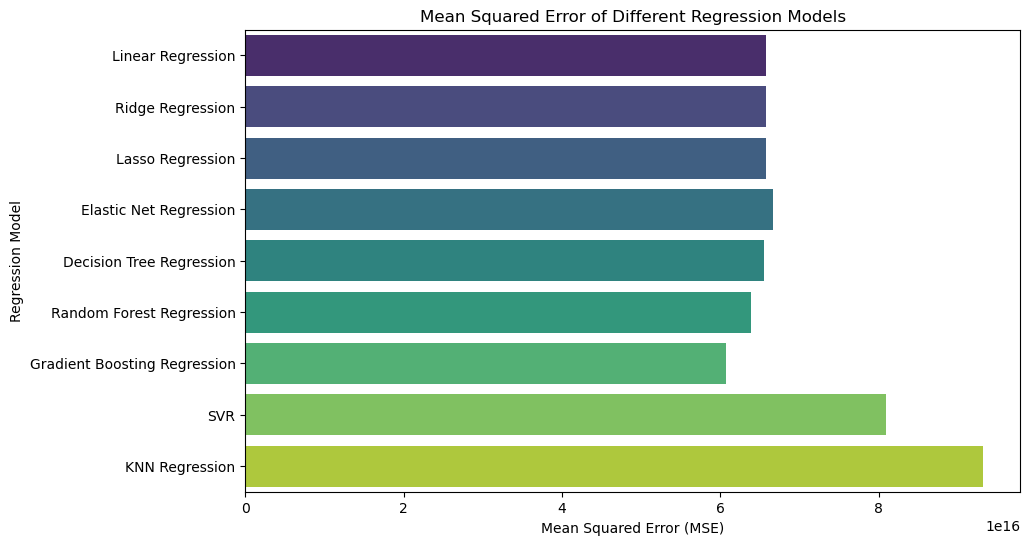

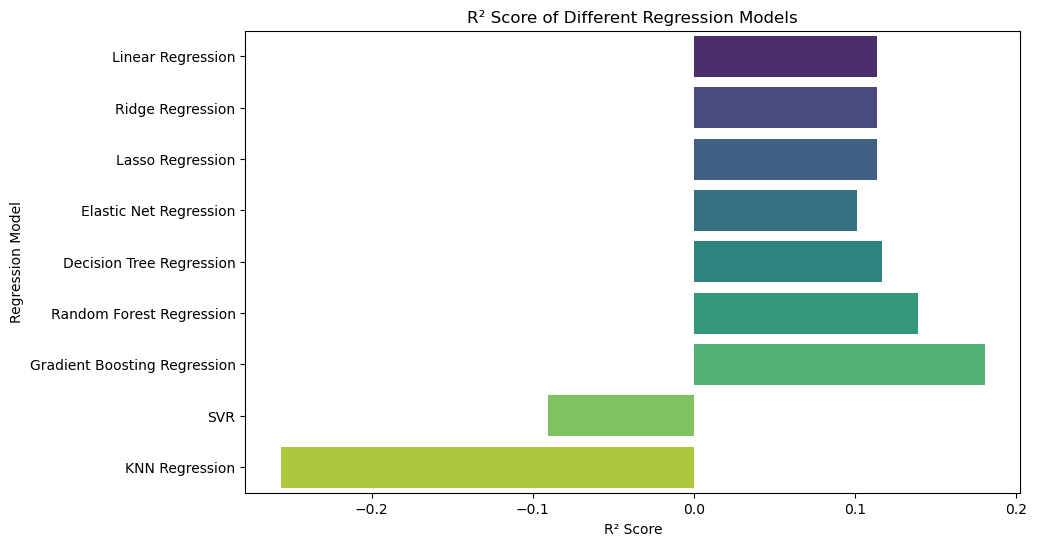

In [6]:
# Plotting Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=df_results, palette='viridis')
plt.title('Mean Squared Error of Different Regression Models')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Regression Model')
plt.show()

# Plotting R² Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=df_results, palette='viridis')
plt.title('R² Score of Different Regression Models')
plt.xlabel('R² Score')
plt.ylabel('Regression Model')
plt.show()

In [7]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MSE:", mean_squared_error(y_train, y_pred_baseline))
   

Mean price: 168279190.80992544
Baseline MSE: 8.19581461363317e+16


Based on the results provided, Gradient Boosting Regression is the best model for predicting house prices. It has the lowest Mean Squared Error (MSE) of 60,784,210,388,042,096.0000 and the highest R² score of 0.1808. The higher R² score indicates that this model explains more variance in the target variable compared to the other models, and the lower MSE suggests it has better predictive accuracy.

In [8]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],  # Reasonable range to balance between speed and accuracy
    'learning_rate': [0.05, 0.1, 0.2],  # Narrowed down range for learning rate
    'max_depth': [2, 3, 4],  # Typical values for max depth
    'min_samples_split': [2, 3],  # Typical values to control overfitting
    'min_samples_leaf': [1, 2],  # Reasonable range for leaf size
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=gbr, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1  # Add verbosity for tracking progress
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best model after grid search
best_gbr = grid_search.best_estimator_

# Output the best parameters found
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score: ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best R² score:  0.14017622112809774


In [9]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [10]:
best_params_randCV = random_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.01}


In [11]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=10,
                          n_estimators=300)

In [12]:
y_pred = best_grid_randCV.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 61001125585843896.0000
  R2 Score: 0.1778


In [13]:
def make_prediction(bedrooms, bathrooms, toilets, parking_space):
    data = {
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "toilets": toilets,
        "parking_space": parking_space,
    }

    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction[0]}"

# Testing 
print(make_prediction(bedrooms=5, bathrooms=4, toilets=5, parking_space=4))

Predicted apartment price: ₦143044137.97160098


In [14]:
custom_font_style = {
    'font-family': 'Garamond',   
    'font-size': '20px'      
}

interact(
    make_prediction,    
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
        style=custom_font_style
    ),
    bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        step=1,
        value=X_train["bathrooms"].mean(),
        style=custom_font_style
    ),
    toilets=IntSlider(
        min=X_train["toilets"].min(),
        max=X_train["toilets"].max(),
        step=1,
        value=X_train["toilets"].mean(),
        style=custom_font_style
    ),
    parking_space=IntSlider(
        min=X_train["parking_space"].min(),
        max=X_train["parking_space"].max(),
        step=1,
        value=X_train["parking_space"].mean(),
        style=custom_font_style
    )
    
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=9, min=1), IntSlider(value=4, description…

### Conclusion
In this project, we developed and evaluated several machine learning models to predict house prices in Nigeria based on features such as the number of bedrooms, bathrooms, toilets, and parking spaces. After comparing various models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, and K-Nearest Neighbors, the Gradient Boosting Regressor emerged as the best-performing model.

The model was fine-tuned using a randomized search, and the final version demonstrated the lowest Mean Squared Error and the highest R² Score among all tested models, indicating a more accurate and reliable prediction of house prices.

This project serves as a valuable tool for real estate professionals, investors, and individuals looking to estimate the value of properties in Nigeria. By leveraging the power of machine learning, we can make data-driven decisions and gain insights into the factors influencing house prices in different regions of the country.